# Matlab signal processing

## read the signal from files

In [ ]:
ecg_sig = load('ecg.txt')
plot(ecg_sig)
ylabel('Amplitude')
xlabel("Sample Number")

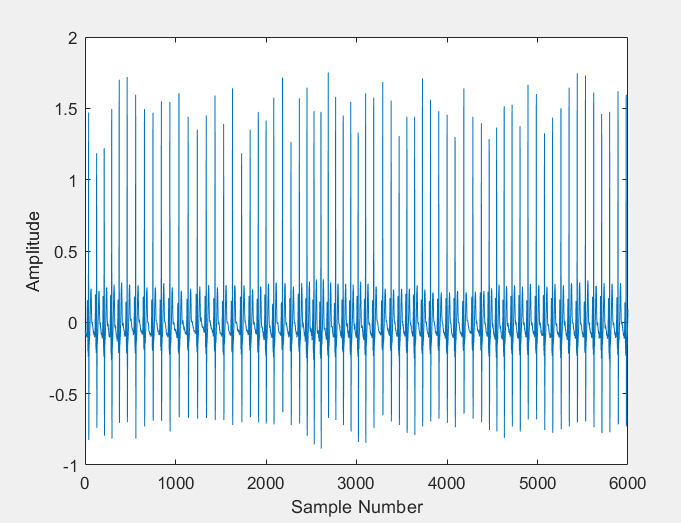